# Computational Linear Algebra: PCA Homework

## Exercise 0.0: Initialization
Fill the missing values in this text box. **Remove the information of the second student if you are not working in a team**.

**Academic Year:** YYYY/YYYY

### Team Members (Alphabetical Order):
1. Surname1, Name1 (StudentID1);
2. Surname2, Name2 (StudentID2).

Now, fill the python list below with the Student IDs of the team

In [1]:
StudentIDs = [353995,353012]  # <-------- Fill this list with Student IDs of the team

## Exercise 0.1: Starting Code-Cell 

Download the .csv files from the web page of the course (*responses_hw.csv* and *columns_hw.csv*) and past them in **the same folder of this notebook**.


Then, run the cell below, **without modifing any line of code**.

The output of this code cell is **your personal subset of the original dataset**, with 2/3 of the original features (i.e., columns) and 3/4 of the original persons (i.e., rows).

### ATTENTION: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL, ANY CHANGE CAN INVALIDATE THE HOMEWORK!

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np
import pandas as pd
from IPython.display import display

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']
features_all = []
for tt in variables_by_type.keys():
    if tt != 'Demographics':
        features_all += variables_by_type[tt]

def which_features(*StudentIDs):
    random_seed = min(StudentIDs)
    np.random.seed(random_seed)
    features_ = np.random.choice(features_all, int((2 * len(features_all)) / 3), replace=False).tolist()
    features = []
    features_by_type = {tt: [] for tt in variables_by_type.keys() if tt != 'Demographics'}
    for tt in variables_by_type.keys():
        ft_list = variables_by_type[tt]
        for ii in range(len(ft_list)):
            if ft_list[ii] in features_:
                features.append(ft_list[ii])
                features_by_type[tt].append(ft_list[ii])

    return features, features_by_type

features, features_by_type = which_features(*StudentIDs)

print(f'*** THESE ARE THE {len(features)} SELECTED FEATURES (SEE VARIABLE features):')
for ff in features:
    print(f'{ff}')
print('*************************************')
print('')
print('*** SELECTED FEATURES BY TYPES (SEE VARIABLE features_by_type):')
for tt in features_by_type.keys():
    print(f'{tt}: {features_by_type[tt]}')
    print('')
print('*************************************')
print('')
print('*** THESE ARE THE LABELS (SEE VARIABLE labels):')
for ll in labels:
    print(f'{ll}')
print('*************************************')

def which_rows(df, frac, *StudentIDs):
    random_seed = min(StudentIDs)
    df_ = df.sample(frac=frac, random_state=random_seed)
    return df_

responses_hw = pd.read_csv('responses_hw.csv', index_col=0)
responses = which_rows(responses_hw, 0.75, *StudentIDs)
responses = responses.loc[:, features + labels]

responses_ft = responses.loc[:, features]
responses_lb = responses.loc[:, labels]

print('')
print('*** THIS IS YOUR PERSONAL DATASET (features AND labels TOGETHER, SEE VARIABLE responses)')
display(responses)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)')
display(responses_ft)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)')
display(responses_lb)

random_seed = min(StudentIDs)
np.random.seed(random_seed)

your_scaler = np.random.choice(['StandardScaler', 'MinMaxScaler'])


*** THESE ARE THE 93 SELECTED FEATURES (SEE VARIABLE features):
Finances
Shopping centres
Branded clothing
Spending on healthy eating
Smoking
Alcohol
Healthy eating
History
Politics
Mathematics
Physics
PC
Economy Management
Chemistry
Foreign languages
Law
Art exhibitions
Religion
Countryside, outdoors
Musical instruments
Active sport
Gardening
Celebrities
Science and technology
Pets
Movies
Horror
Comedy
Romantic
Sci-fi
War
Fantasy/Fairy tales
Animated
Western
Dance
Country
Classical music
Metal or Hardrock
Swing, Jazz
Alternative
Techno, Trance
Opera
Daily events
Prioritising workload
Writing notes
Thinking ahead
Keeping promises
Loss of interest
Friends versus money
Funniness
Criminal damage
Decision making
Elections
Self-criticism
Judgment calls
Empathy
Eating to survive
Giving
Borrowed stuff
Loneliness
Cheating in school
Health
Changing the past
God
Dreams
Charity
Number of friends
Punctuality
Lying
Waiting
New environment
Mood swings
Appearence and gestures
Achievements
Responding 

,Finances,Shopping centres,Branded clothing,Spending on healthy eating,Smoking,Alcohol,Healthy eating,History,Politics,Mathematics,...,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
539,4,4,4,4,tried smoking,social drinker,3,3,4,4,...,27,189,113,3,male,left,doctorate degree,no,city,house/bungalow
193,4,2,1,4,tried smoking,social drinker,3,3,3,2,...,17,158,57,1,female,right,secondary school,no,village,house/bungalow
136,4,4,4,3,never smoked,social drinker,4,3,2,5,...,16,158,48,1,female,left,primary school,no,city,block of flats
414,1,2,1,1,current smoker,drink a lot,1,4,1,1,...,17,168,67,1,male,right,primary school,yes,village,house/bungalow
325,3,5,5,5,former smoker,social drinker,5,1,2,3,...,28,180,63,2,female,right,masters degree,no,city,block of flats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,3,4,3,3,never smoked,social drinker,3,4,3,2,...,19,162,47,1,female,right,secondary school,no,village,house/bungalow
177,4,5,5,4,tried smoking,never,3,5,2,5,...,27,180,80,0,male,right,masters degree,yes,city,block of flats
171,3,5,3,3,former smoker,social drinker,2,2,3,4,...,18,173,64,3,female,right,secondary school,no,city,house/bungalow
321,5,2,1,4,never smoked,social drinker,4,5,5,3,...,26,163,55,3,female,left,masters degree,no,village,house/bungalow



*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)


,Finances,Shopping centres,Branded clothing,Spending on healthy eating,Smoking,Alcohol,Healthy eating,History,Politics,Mathematics,...,Parents' advice,Questionnaires or polls,Internet usage,Flying,Storm,Darkness,Snakes,Rats,Ageing,Fear of public speaking
539,4,4,4,4,tried smoking,social drinker,3,3,4,4,...,4,4,less than an hour a day,5,3,4,5,3,4,4
193,4,2,1,4,tried smoking,social drinker,3,3,3,2,...,2,4,few hours a day,1,1,1,2,2,2,3
136,4,4,4,3,never smoked,social drinker,4,3,2,5,...,4,4,few hours a day,2,2,2,1,2,3,3
414,1,2,1,1,current smoker,drink a lot,1,4,1,1,...,2,2,most of the day,2,1,1,1,1,1,5
325,3,5,5,5,former smoker,social drinker,5,1,2,3,...,4,1,less than an hour a day,1,4,5,5,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,3,4,3,3,never smoked,social drinker,3,4,3,2,...,4,3,few hours a day,1,1,2,3,2,1,4
177,4,5,5,4,tried smoking,never,3,5,2,5,...,3,1,few hours a day,1,1,1,4,4,5,1
171,3,5,3,3,former smoker,social drinker,2,2,3,4,...,2,2,few hours a day,1,1,5,1,4,3,5
321,5,2,1,4,never smoked,social drinker,4,5,5,3,...,5,4,less than an hour a day,5,3,3,5,4,1,3



*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)


,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
539,27,189,113,3,male,left,doctorate degree,no,city,house/bungalow
193,17,158,57,1,female,right,secondary school,no,village,house/bungalow
136,16,158,48,1,female,left,primary school,no,city,block of flats
414,17,168,67,1,male,right,primary school,yes,village,house/bungalow
325,28,180,63,2,female,right,masters degree,no,city,block of flats
...,...,...,...,...,...,...,...,...,...,...
635,19,162,47,1,female,right,secondary school,no,village,house/bungalow
177,27,180,80,0,male,right,masters degree,yes,city,block of flats
171,18,173,64,3,female,right,secondary school,no,city,house/bungalow
321,26,163,55,3,female,left,masters degree,no,village,house/bungalow


## Exercise 0.2: Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.

For reproducibility, **no extra modules are allowed**.

**DO NOT IMPORT NUMPY NOR PANDAS**, they are already imported.

In [59]:
# DO NOT IMPORT NUMPY AND PANDAS - Already imported
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib widget
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## Exercise 1. Dataset Preprocessing

In this exercise, you have to do the following operations on the dataset of the features **responses_ft**:
1. Create a new dataframe called **responses_ft_enc** by encoding the categorical features (if they exist), motivating your choices;
1. Create a new dataframe called **responses_ft_pp** by preprocessing the data in **responses_ft_enc**, according to the scaler reported in the cell below.

In [ ]:
print(f'*** YOU HAVE TO APPLY A PREPROCESSING USING THE {your_scaler}')

*** YOU HAVE TO APPLY A PREPROCESSING USING THE StandardScaler


For doing this exercise, fill the cells below following the instructions you read.

#### Describe and motivate the encoding operations you will apply (max 150 words):
...

#### Describe the preprocessing operation you will apply and comment the effects it may have on the data (max 150 words):
...

#### Write the code for performing the encoding and preprocessing operations of the exercise. Show the encoded data and the preprocessed data you obtain, plus any additional table/value that can be useful for commenting the results:

In [27]:

# Columns to encode
cat_cols = [
    "Smoking", "Alcohol", "Punctuality", "Lying", "Internet usage"
]

# Define category order for each column (must match cat_cols)
#Without specifying categories=, sklearn will sort alphabetically → WRONG ORDER
categories = [
    ["never smoked", "tried smoking", "former smoker", "current smoker"],           # Smoking
    ["never", "social drinker", "drink a lot"],                                     # Alcohol
    ["early", "on time", "late"],                                                   # Punctuality
    ["never", "only to avoid hurting someone", "sometimes", "everytime it suits me"], # Lying
    ["no time at all", "less than an hour a day", "few hours a day", "most of the day"] # Internet usage
]

encoder = OrdinalEncoder(categories=categories)

responses_ft_enc = responses_ft.copy()
responses_ft_enc[cat_cols] = encoder.fit_transform(responses_ft_enc[cat_cols]).astype(int)
display(responses_ft_enc)


responses_scaled = StandardScaler().fit_transform(responses_ft_enc)
responses_ft_pp = pd.DataFrame(
    responses_scaled,
    columns=responses_ft_enc.columns,
    index=responses_ft_enc.index
)

display(responses_ft_pp)


,Finances,Shopping centres,Branded clothing,Spending on healthy eating,Smoking,Alcohol,Healthy eating,History,Politics,Mathematics,...,Parents' advice,Questionnaires or polls,Internet usage,Flying,Storm,Darkness,Snakes,Rats,Ageing,Fear of public speaking
539,4,4,4,4,1,1,3,3,4,4,...,4,4,1,5,3,4,5,3,4,4
193,4,2,1,4,1,1,3,3,3,2,...,2,4,2,1,1,1,2,2,2,3
136,4,4,4,3,0,1,4,3,2,5,...,4,4,2,2,2,2,1,2,3,3
414,1,2,1,1,3,2,1,4,1,1,...,2,2,3,2,1,1,1,1,1,5
325,3,5,5,5,2,1,5,1,2,3,...,4,1,1,1,4,5,5,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,3,4,3,3,0,1,3,4,3,2,...,4,3,2,1,1,2,3,2,1,4
177,4,5,5,4,1,0,3,5,2,5,...,3,1,2,1,1,1,4,4,5,1
171,3,5,3,3,2,1,2,2,3,4,...,2,2,2,1,1,5,1,4,3,5
321,5,2,1,4,0,1,4,5,5,3,...,5,4,1,5,3,3,5,4,1,3


,Finances,Shopping centres,Branded clothing,Spending on healthy eating,Smoking,Alcohol,Healthy eating,History,Politics,Mathematics,...,Parents' advice,Questionnaires or polls,Internet usage,Flying,Storm,Darkness,Snakes,Rats,Ageing,Fear of public speaking
539,0.806717,0.592059,0.735077,0.427995,-0.283977,-0.201223,-0.008556,-0.214478,1.054409,1.179373,...,0.843361,1.141844,-1.878591,2.522307,0.923445,1.404532,1.303988,0.447102,1.113085,0.974176
193,0.806717,-0.928661,-1.514614,0.427995,-0.283977,-0.201223,-0.008556,-0.214478,0.285632,-0.283281,...,-1.501368,1.141844,0.069292,-0.847429,-0.823333,-1.021042,-0.679433,-0.282684,-0.372986,0.131555
136,0.806717,0.592059,0.735077,-0.485784,-1.295896,-0.201223,1.073748,-0.214478,-0.483144,1.910700,...,0.843361,1.141844,0.069292,-0.004995,0.050056,-0.212517,-1.340573,-0.282684,0.370049,0.131555
414,-1.843923,-0.928661,-1.514614,-2.313341,1.739861,1.585069,-2.173164,0.589417,-1.251921,-1.014608,...,-1.501368,-0.692356,2.017176,-0.004995,-0.823333,-1.021042,-1.340573,-1.012470,-1.116022,1.816797
325,-0.076830,1.352419,1.484974,1.341774,0.727942,-0.201223,2.156052,-1.822268,-0.483144,0.448046,...,0.843361,-1.609456,-1.878591,-0.847429,1.796834,2.213056,1.303988,1.906673,1.856120,0.974176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.076830,0.592059,-0.014820,-0.485784,-1.295896,-0.201223,-0.008556,0.589417,0.285632,-0.283281,...,0.843361,0.224744,0.069292,-0.847429,-0.823333,-0.212517,-0.018292,-0.282684,-1.116022,0.974176
177,0.806717,1.352419,1.484974,0.427995,-0.283977,-1.987514,-0.008556,1.393312,-0.483144,1.910700,...,-0.329004,-1.609456,0.069292,-0.847429,-0.823333,-1.021042,0.642848,1.176888,1.856120,-1.553686
171,-0.076830,1.352419,-0.014820,-0.485784,0.727942,-0.201223,-1.090860,-1.018373,0.285632,1.179373,...,-1.501368,-0.692356,0.069292,-0.847429,-0.823333,2.213056,-1.340573,1.176888,0.370049,1.816797
321,1.690263,-0.928661,-1.514614,0.427995,-1.295896,-0.201223,1.073748,1.393312,1.823186,0.448046,...,2.015726,1.141844,-1.878591,2.522307,0.923445,0.596007,1.303988,1.176888,-1.116022,0.131555


#### Comment the results obtained after the preprocessing operation (max 100 words):
...

## Exercise 2. Analyzing the Variance and the PCs

In this exercise, you have to do the following operations:
1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;
1. compute all the $n$ Principal Components (PCs) for *responses_ft_enc* and *responses_ft_pp*, separately, and visualize the curves of the cumulative explained variances.

For doing this exercise, fill the cells below following the instructions you read.

#### Write the code for computing and visualizing the variance of the features of the two datasets:

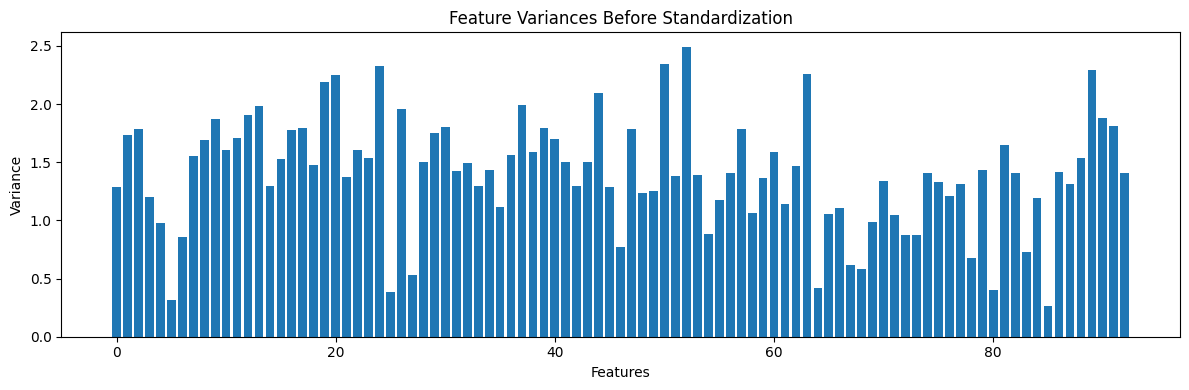

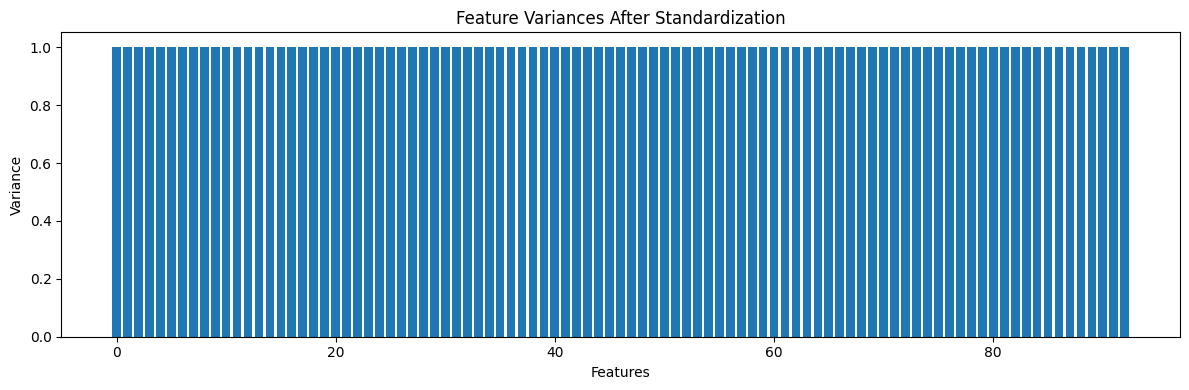

In [28]:
# [write the code here]
var_before = responses_ft_enc.var()

plt.figure(figsize=(12, 4))
plt.bar(range(len(var_before)), var_before.values)
plt.title("Feature Variances Before Standardization")
plt.xlabel("Features")
plt.ylabel("Variance")
plt.tight_layout()
plt.show()

# -----------------------------------------
# 2. Variance AFTER scaling (standardized data)
# -----------------------------------------
var_after = responses_ft_pp.var()

plt.figure(figsize=(12, 4))
plt.bar(range(len(var_after)), var_after.values)
plt.title("Feature Variances After Standardization")
plt.xlabel("Features")
plt.ylabel("Variance")
plt.tight_layout()
plt.show()



#### Comment the results obtained for the variances (max 150 words):
...

#### Write the code for computing all the $n$ PCs of the two datasets, separately, and for visualizing the curves of cumulative explained variances:

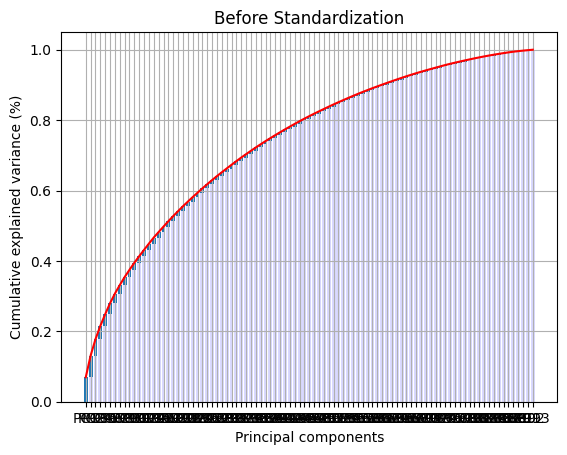

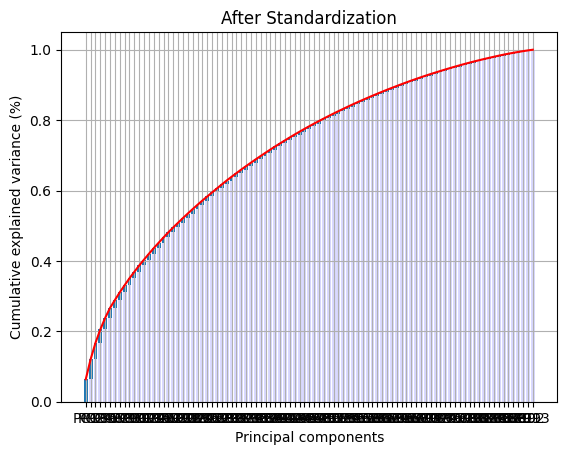

[0.06384543 0.12059089 0.16717603 0.20543621 0.23819795 0.26665
 0.28892884 0.31082724 0.33091998 0.35074928 0.36911988 0.38711506
 0.40392327 0.42040549 0.43638338 0.45161931 0.46660397 0.48129538
 0.49509876 0.50846305 0.52176577 0.53458833 0.54719454 0.55940921
 0.57154134 0.58312042 0.59463674 0.60602936 0.61728702 0.62835419
 0.63897162 0.64933949 0.65957006 0.66945265 0.67911105 0.68873759
 0.69810299 0.70735852 0.71647599 0.72535146 0.73394685 0.74243594
 0.75091791 0.7590958  0.76713992 0.77499674 0.7826121  0.79018012
 0.79746787 0.80463588 0.81171949 0.81865516 0.82542942 0.83204527
 0.83859711 0.84504211 0.85126315 0.85736725 0.86333081 0.86926081
 0.87497429 0.88065236 0.8862334  0.89160745 0.89691141 0.90211988
 0.90724593 0.91225061 0.91710919 0.92186026 0.92652264 0.9309647
 0.93531267 0.93963665 0.94385651 0.94800276 0.95197484 0.95587983
 0.95967484 0.96337238 0.96693942 0.97030516 0.973646   0.97687941
 0.98002055 0.98310134 0.98601593 0.98876164 0.99123979 0.99370948

In [46]:
pca_enc = PCA()
pca_pp = PCA()

pca_enc.fit(responses_ft_enc)
pca_pp.fit(responses_ft_pp)

plt.figure()
plt.bar(np.arange(pca_enc.n_features_in_), pca_enc.explained_variance_ratio_, bottom=np.insert(np.cumsum(pca_enc.explained_variance_ratio_), 0, 0)[:-1])
plt.bar(np.arange(pca_enc.n_features_in_), np.insert(np.cumsum(pca_enc.explained_variance_ratio_), 0, 0)[:-1], color='b', alpha=0.15)
plt.plot(np.cumsum(pca_enc.explained_variance_ratio_), 'r')
plt.title('Before Standardization')
plt.xticks(ticks=np.arange(pca_enc.n_features_in_), 
           labels=[f'PC{i}' for i in range(1, pca_enc.n_features_in_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_pp.n_features_in_), pca_pp.explained_variance_ratio_, bottom=np.insert(np.cumsum(pca_pp.explained_variance_ratio_), 0, 0)[:-1])
plt.bar(np.arange(pca_pp.n_features_in_), np.insert(np.cumsum(pca_pp.explained_variance_ratio_), 0, 0)[:-1], color='b', alpha=0.15)
plt.plot(np.cumsum(pca_pp.explained_variance_ratio_), 'r')
plt.title('After Standardization')
plt.xticks(ticks=np.arange(pca_pp.n_features_in_), 
           labels=[f'PC{i}' for i in range(1, pca_pp.n_features_in_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.show()

print(np.cumsum(pca_pp.explained_variance_ratio_))

#### Comment the results obtained for the cumulative explained variances, knowing the vaues in the datasets and the fetures' variances (max 150 words):

...

## Exercise 3. Dimensionality Reduction and PC Interpretation

In this exercise, you have to do the following operations:
1. For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
1. Visualize as a barplot the explained variance (as percentage) for each PC, and report the preserved explained variance (as percentage) by the $m$ PCs.
1. Visualize all the PCs as barplots and give an interpretation and a name to them, **motivating your choices**.
1. Transform the *responses_ft_pp* data into their $m$-dimensional representation via PCA. Store the transformed data in the variable *responses_ft_pca*;
1. Visualize the the score graph. If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs (given at the previous step) on the axes** for better understanding the results.

#### Write the code for computing the new PCA, for visualizing the $m$ PCs as barplots:

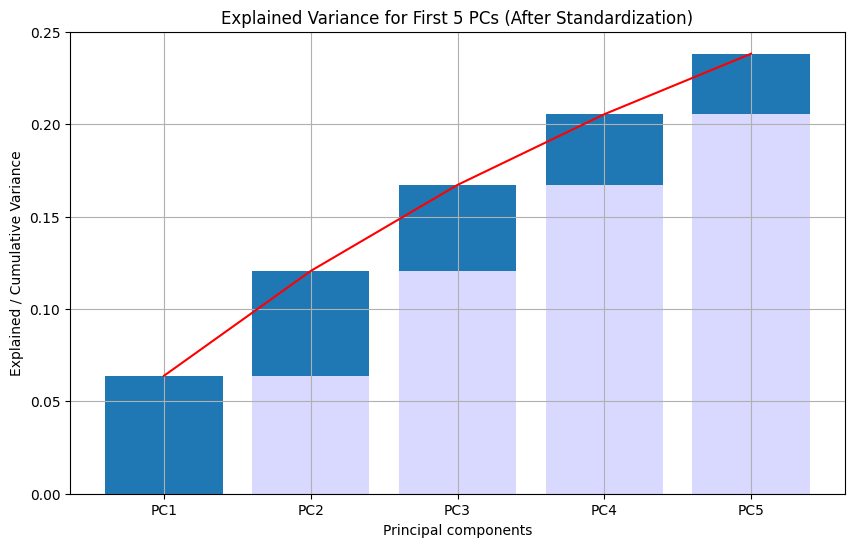

Total preserved explained variance by 5 PCs: 23.82%


<Figure size 1400x3000 with 0 Axes>

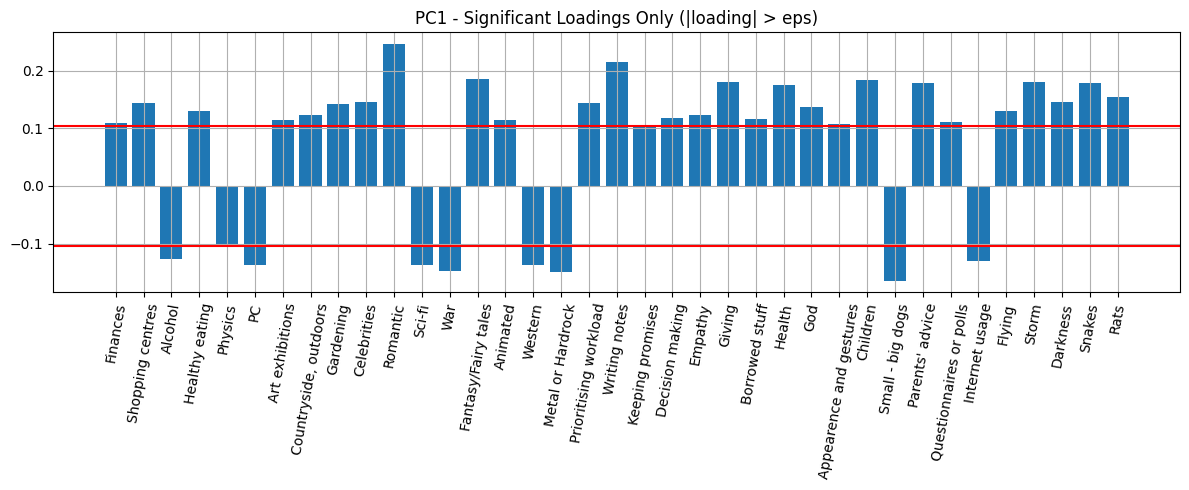

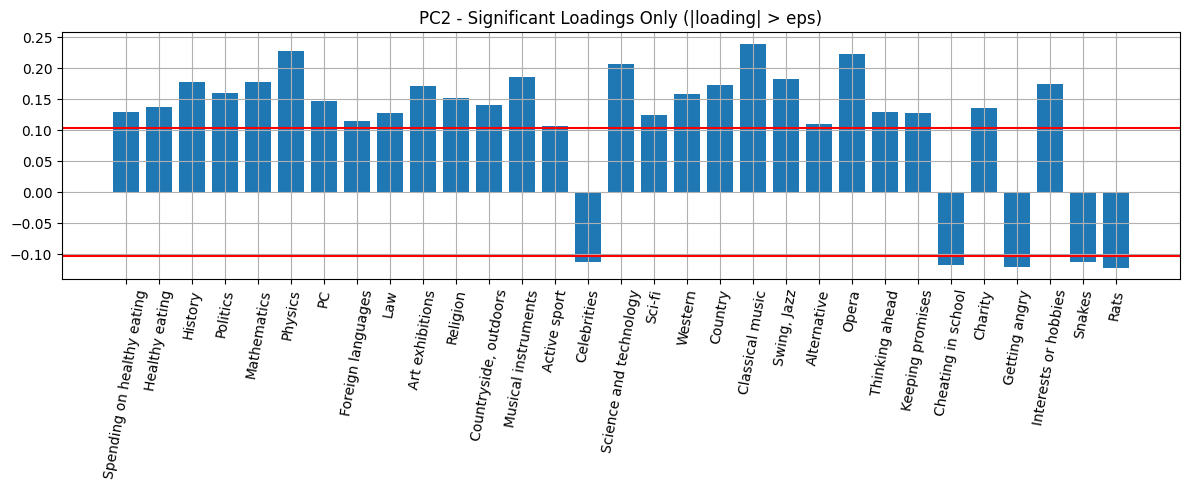

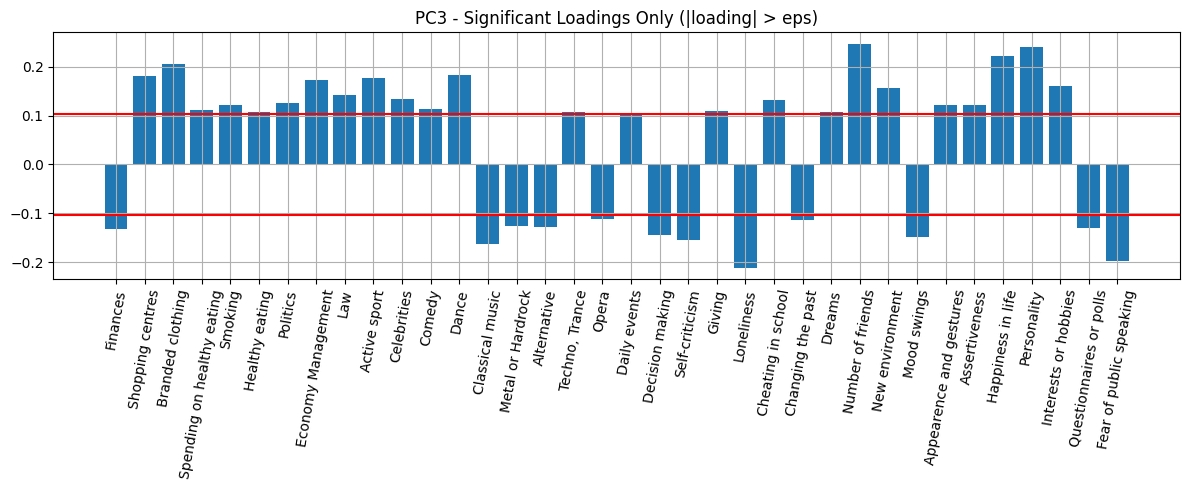

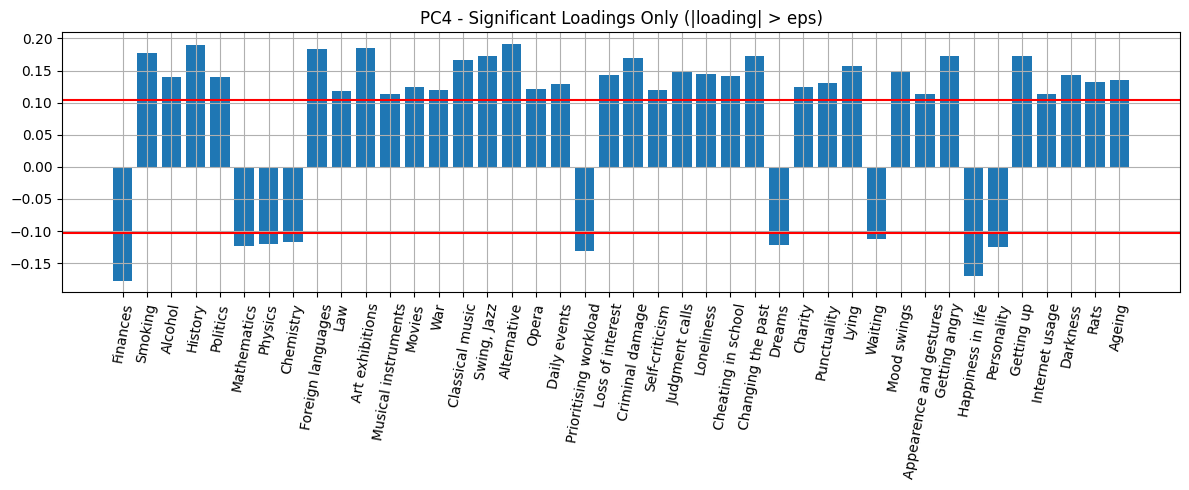

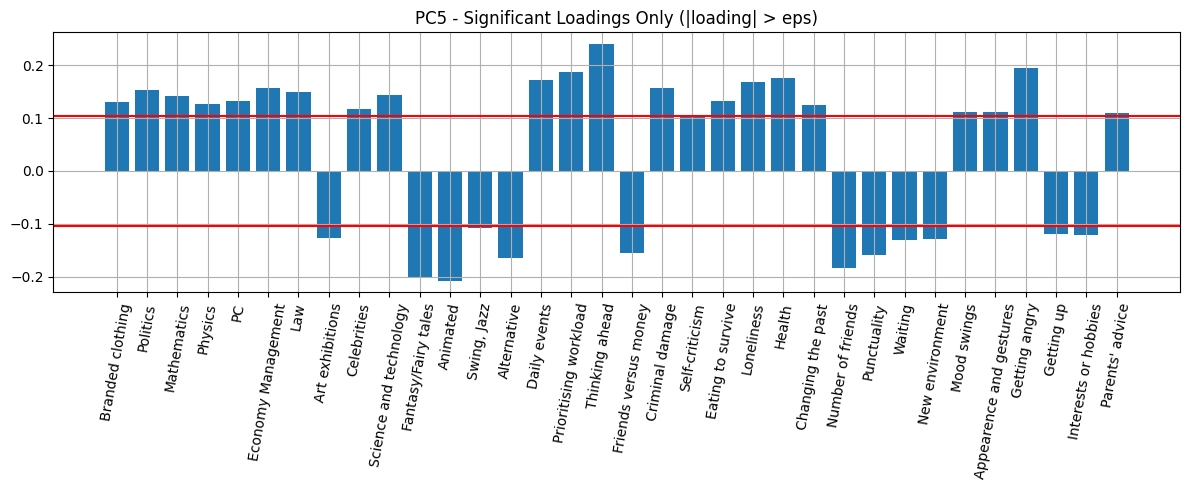


=== Top Contributing Features for PC1 ===

Positive direction:
Romantic               0.246358
Writing notes          0.214650
Fantasy/Fairy tales    0.185876
Children               0.183465
Giving                 0.180016
Name: PC1, dtype: float64

Negative direction:
Small - big dogs    -0.164419
Metal or Hardrock   -0.149239
War                 -0.148217
Western             -0.137401
Sci-fi              -0.137021
Name: PC1, dtype: float64

-------------------------------------------

=== Top Contributing Features for PC2 ===

Positive direction:
Classical music           0.239528
Physics                   0.228207
Opera                     0.222475
Science and technology    0.206279
Musical instruments       0.185754
Name: PC2, dtype: float64

Negative direction:
Rats                 -0.121563
Getting angry        -0.120863
Cheating in school   -0.117249
Celebrities          -0.112802
Snakes               -0.111822
Name: PC2, dtype: float64

----------------------------------------

In [ ]:
pca_pp_reduced = PCA(n_components=5)
pca_pp_reduced.fit(responses_ft_pp)

responses_ft_pp_reducted = pca_pp_reduced.transform(responses_ft_pp)

expl_var = pca_pp_reduced.explained_variance_ratio_

# Cumulative preserved variance
cum_expl_var = np.sum(expl_var) * 100

# ================================
# Barplot of explained variances
# ================================
evr = pca_pp_reduced.explained_variance_ratio_
cum_evr = np.cumsum(evr)

plt.figure(figsize=(10, 6))

# Stacked bar: each PC's variance, stacked on top of cumulative so far
plt.bar(np.arange(1, 6), evr, 
        bottom=np.insert(cum_evr, 0, 0)[:-1])

# Light blue bar showing cumulative variance band
plt.bar(np.arange(1, 6),
        np.insert(cum_evr, 0, 0)[:-1],
        color='b', alpha=0.15)

# Red cumulative curve
plt.plot(np.arange(1, 6), cum_evr, 'r')

plt.title('Explained Variance for First 5 PCs (After Standardization)')
plt.xticks(ticks=np.arange(1, 6),
           labels=[f'PC{i}' for i in range(1, 6)])
plt.xlabel('Principal components')
plt.ylabel('Explained / Cumulative Variance')
plt.grid(True)
plt.show()

# ------------ PRINT PRESERVED VARIANCE ------------
preserved = cum_evr[-1] * 100
print(f"Total preserved explained variance by 5 PCs: {preserved:.2f}%")


plt.figure(figsize=(14, 30))

n_features = 93
eps = np.sqrt(1 / n_features)

feature_names = responses_ft_pp.columns.to_list()


for pc in range(5):

    # Loadings for PC_i
    loadings = pca_pp_reduced.components_[pc, :]
    
    # Mask: keep only loadings above +eps or below –eps
    mask = (loadings >= eps) | (loadings <= -eps)
    
    # Filtered loadings + feature names
    filtered_loadings = loadings[mask]
    filtered_features = np.array(feature_names)[mask]

    plt.figure(figsize=(12, 5))
    
    # Barplot only for selected features
    plt.bar(filtered_features, filtered_loadings)
    
    # Draw threshold lines (horizontal)
    plt.axhline(eps, color='red')
    plt.axhline(-eps, color='red')
    
    plt.xticks(rotation=80)
    plt.title(f"PC{pc+1} - Significant Loadings Only (|loading| > eps)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

loadings = pd.DataFrame(
    pca_pp_reduced.components_.T,
    index=responses_ft_pp.columns,
    columns=[f"PC{i}" for i in range(1, pca_pp_reduced.n_components_ + 1)]
)
for i in range(1, pca_pp_reduced.n_components_ + 1):
    print(f"\n=== Top Contributing Features for PC{i} ===")
    top_pos = loadings[f"PC{i}"].sort_values(ascending=False).head(5)
    top_neg = loadings[f"PC{i}"].sort_values().head(5)

    print("\nPositive direction:")
    print(top_pos)

    print("\nNegative direction:")
    print(top_neg)

    print("\n-------------------------------------------")



#### For each PC, write the name you assigned to it and a brief interpretation that motivate the choice (max 100 words per PC):

PC1 — “Emotional Sensitivity vs Action-Oriented Preferences”

Reason:
Positive loadings reflect empathy, care, fantasy, and nurturing attitudes (Romantic, Giving, Children).
Negative loadings reflect preference for aggressive or high-intensity content (War, Western, Hardrock, Sci-fi).

PC2 — “Cultural–Scientific Interests vs Impulsive Traits”

Reason:
Positive loadings highlight classical music, physics, opera, and scientific curiosity.
Negative loadings involve anger, cheating, celebrity interest, and phobias—traits linked to impulsivity or emotional instability.

PC3 — “Sociability & Confidence vs Loneliness & Anxiety”

Reason:
Positive loadings reflect sociability, happiness, self-confidence, and social expression.
Negative loadings reflect loneliness, fear of public speaking, mood instability, and self-criticism.

PC4 — “Cultural Openness vs Practical Self-Management”

Reason:
Positive loadings show interest in alternative music, history, art, and languages (cultural/creative profile).
Negative loadings include finances, workload prioritization, and life satisfaction—indicating practical discipline and self-organization.

PC5 — “Planning & Self-Control vs Expressive Spontaneity”

Reason:
Positive loadings relate to planning ahead, health, and daily self-monitoring.
Negative loadings involve animation, fantasy, social expression, and less punctuality—traits linked to spontaneity and expressiveness.

#### Write the code for visualizing the score graph (with PC names on the axis):

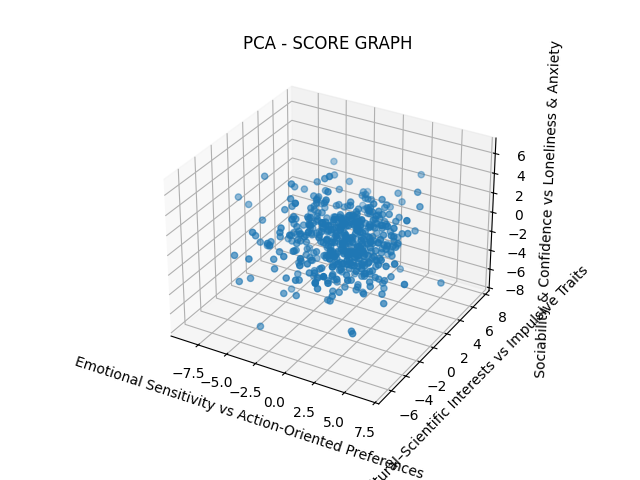

In [75]:
# [write the code here]
pca_pp_reduced = PCA(n_components=5)
pca_pp_reduced.fit(responses_ft_pp)

responses_ft_pca = pca_pp_reduced.transform(responses_ft_pp)



fig_pca = plt.figure()
ax = fig_pca.add_subplot(111, projection='3d')
ax.scatter(responses_ft_pca[:, 0], responses_ft_pca[:, 1], responses_ft_pca[:, 2])
plt.title('PCA - SCORE GRAPH')
ax.set_xlabel('Emotional Sensitivity vs Action-Oriented Preferences')
ax.set_ylabel('Cultural–Scientific Interests vs Impulsive Traits')
ax.set_zlabel('Sociability & Confidence vs Loneliness & Anxiety')
plt.grid()
plt.show()

## Exercise 4. $k$-Means

In this exercise, you have to do the following operations:
1. Run the $k$-Means for clustering the data of *responses_ft_pca*, **setting the input argument *random_state* equal to the variable *random_seed*** (i.e., the minimum of the Student IDs).

   In particular, **use the silohuette score for identifying the best value for $k\in\{3, \ldots, 10\}$** and show it by plotting how the score changes w.r.t. $k$.
1. Plot the score graph again, but add the centroids of the cluster and color the points according to their cluster.
1. Visualize the centroids coordinates as barplots and **give a name and an interpretation to them by exploiting the PC names**.


#### Write the code for performing the items of the list above:

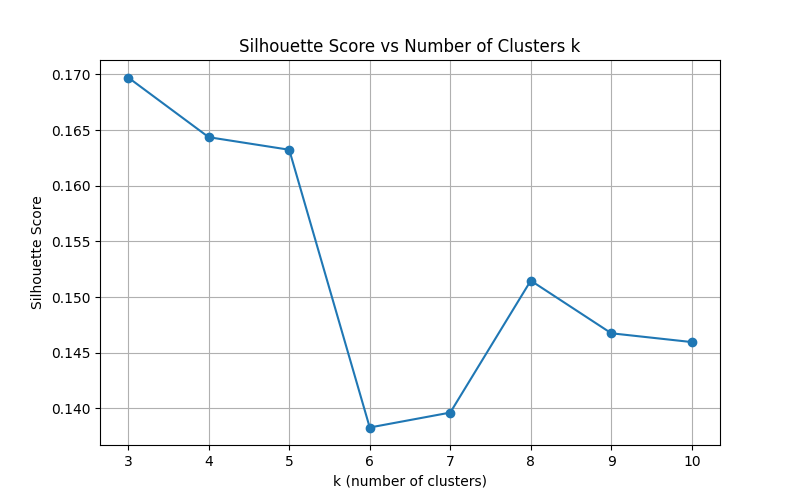

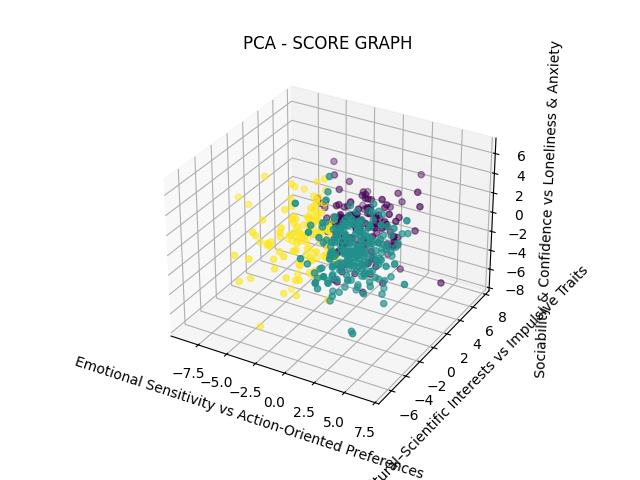

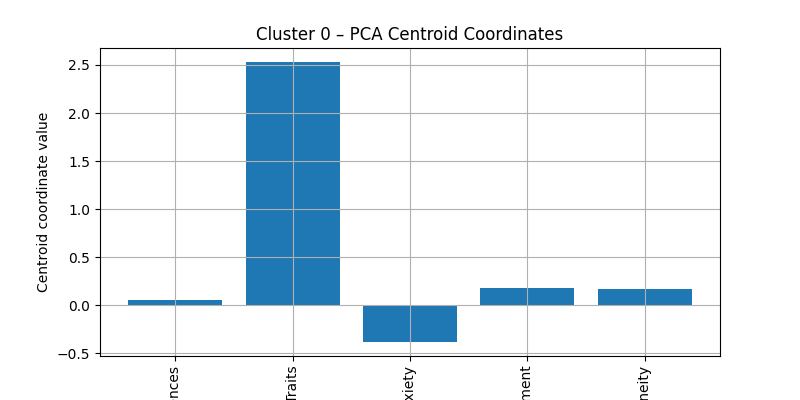

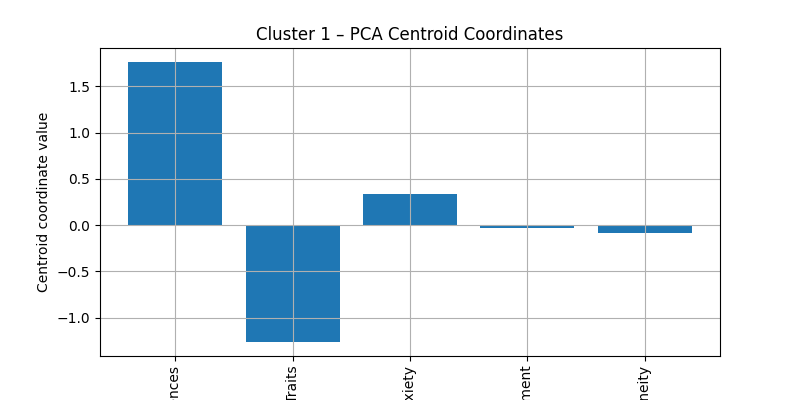

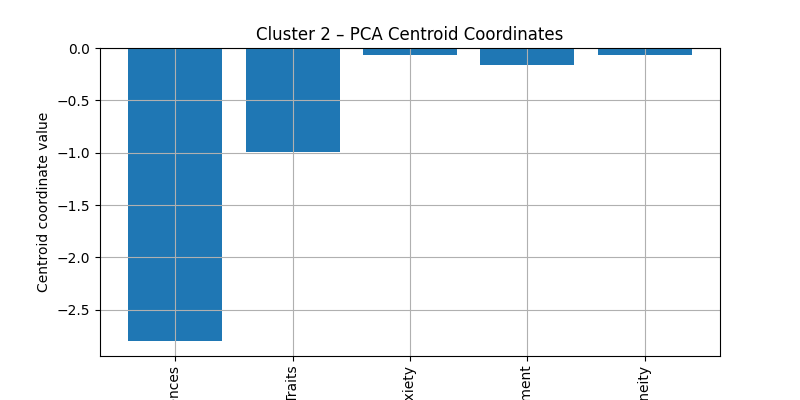

In [91]:
# [write the code here]
X = responses_ft_pca                    # PCA-reduced data (n x m)

k_values = range(3, 11)    # k = 3,4,...,10
silhouette_scores = []

# ----------------------------
# Compute silhouette score for each k
# ----------------------------
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    labels = kmeans.fit_predict(X)
    
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    #print(f"k = {k}, silhouette score = {score:.4f}")

# ----------------------------
# Plot silhouette score vs k
# ----------------------------
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters k")
plt.xlabel("k (number of clusters)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

#Cluster using the chosen k
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=random_seed)
labels = kmeans.fit_predict(X)


fig_pca = plt.figure()
ax = fig_pca.add_subplot(111, projection='3d')
ax.scatter(responses_ft_pca[:, 0], responses_ft_pca[:, 1], responses_ft_pca[:, 2],c=labels)
plt.title('PCA - SCORE GRAPH')
ax.set_xlabel('Emotional Sensitivity vs Action-Oriented Preferences')
ax.set_ylabel('Cultural–Scientific Interests vs Impulsive Traits')
ax.set_zlabel('Sociability & Confidence vs Loneliness & Anxiety')
plt.grid()
plt.show()

#Centroids
centroids = kmeans.cluster_centers_

pc_names = ['Emotional Sensitivity vs Action-Oriented Preferences','Cultural–Scientific Interests vs Impulsive Traits','Sociability & Confidence vs Loneliness & Anxiety','Cultural Openness vs Practical Self-Management','Planning & Self-Control vs Expressive Spontaneity']
num_pcs = pca_pp_reduced.n_components_

for c in range(best_k):
    plt.figure(figsize=(8, 4))
    plt.bar(np.arange(num_pcs), centroids[c])
    
    plt.xticks(np.arange(num_pcs), pc_names,rotation='vertical')
    plt.title(f"Cluster {c} – PCA Centroid Coordinates")
    plt.xlabel("Principal Components")
    plt.ylabel("Centroid coordinate value")
    plt.grid(True)
    
    plt.show()


#### For each Centroid, write the name you assigned to it and a brief interpretation that motivate the choice by exploiting the PC names(max 100 words per centroid):

...

## Exercise 5. Cluster External Evaluations

In this exercise, you have to do the following operations:
1. Select a subset meaningful labels for performing an external evaluation of the clustering results.
1. For each selected label, visualize the distribution of the label in each cluster and in the whole dataset.
1. Visualize the score graph with dots colored with respect to the label value; then, visualize the clusters in separated score-graphs, coloring the points according to the label values.


#### List the Labels you consider meaningful for an external cluster evaluation and motivate your choice (max 50 words per label):

...


#### Write the code for the visualizations cited in item 2 above:

In [ ]:
# [write the code here]

#### For each selected label, comment the results observed in the visualizations (max 100 words per label):

...

## Exercise 6. Cluster Internal Evaluations

In this exercise, you have to do the following operations:
1. For each cluster, measure the corresponding average silhouette score
1. Visualize the silhouette of the clusters and the general one of the clustering and compare them


#### Write the code for computing the silhouette scores and for visualizing them:

In [ ]:
# [write the code here]

#### Comment the results, also considering the results observed previously (e.g., score graphs, centroids, etc. - max 150 words):

...